# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ivan Danendra Ramadhani
- **Email:** ivandanendra13@gmail.com
- **ID Dicoding:** ivan_danendra_q2BO

## Menentukan Pertanyaan Bisnis

**- Pada musim apa sepeda paling banyak dan sedikit disewa?**

**- Pada hari apa dan kisaran jam berapa sepeda paling banyak disewa?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()
print("Jumlah missing value day_df: \n",day_df.isna().sum())
print("Jumlah data terduplikat day_df: ", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah missing value day_df: 
 instant       0
dteday        0
season        0
yr            

Terlihat pada day_df tidak ada missing value, tidak ada date terduplikat.
Yang bermasalah hanyalah tipe data dari dteday yang seharusnya adalah datetime bukan object.

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()
print("Jumlah missing value hour_df: \n",hour_df.isna().sum())
print("Jumlah data terduplikat hour_df: ", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah missing value hour_df: 
 instant       0
d

Terlihat pada hour_df tidak ada missing value, tidak ada date terduplikat. Yang bermasalah hanyalah tipe data dari dteday yang seharusnya adalah datetime bukan object.

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Melakukan penggantian tipe data dteday pada day_df dari object menjadi datetime

In [8]:
for column in ["dteday"]:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah diubah, tipe data dari dteday pada day_df telah menjadi datetime

Melakukan penggantian tipe data dteday pada hour_df dari object menjadi datetime

In [10]:
for column in ["dteday"]:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah diubah, tipe data dari dteday pada hour_df telah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [12]:
day_df.describe(include='all')

<ipython-input-12-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Terlihat bahwa jumlah penyewa sepeda paling banyak dalam satu hari adalah 8714 dan paling sedikit adalah 22.

In [13]:
hour_df.describe(include="all")

<ipython-input-13-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Terlihat bahwa jumlah penyewa sepeda paling banyak dalam satu jam adalah 977 dan paling sedikit adalah 1.

In [14]:
day_df.groupby(by='season').agg({'dteday':'nunique','cnt': 'sum'})

,dteday,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


Dari pivot tabel di atas, diketahui bahwa penyewa sepeda paling banyak pada musim 3 (gugur) dan paling sedikit pada musim 1 (semi).

In [15]:
day_df.groupby(by=['weekday', 'workingday']).agg({'dteday':'nunique','cnt': 'sum'})

dteday     cnt
weekday workingday                
0       0              105  444027
1       0               15   59605
        1               90  395898
2       0                1    1013
        1              103  468096
3       0                1    7403
        1              103  465645
4       0                2    3920
        1              102  481475
5       0                2    6494
        1              102  481296
6       0              105  477807

Dari pivot tabel di atas, diketahui bahwa penyewa sepeda paling banyak pada hari 4 (Kamis) pada saat bukan hari libur.

Melakukan merge untuk day_df dan hour_df menjadi day_hours_df menggunakan metode "left"

In [16]:
day_hours_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
day_hours_df

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [17]:
def categorize_hour(hr):
    if 0 <= hr < 6:
        return 'Dini Hari'
    elif 6 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 18:
        return 'Siang'
    else:
        return 'Malam'

Kode di atas adalah fungsi untuk membuat empat kategori waktu, dengan ketentuan sebagai berikut:


*   Jam 0-5 adalah Dini Hari
*   Jam 6-11 adalah Pagi
*   Jam 12-18 adalah Siang
*   Jam 19-23 adalah Malam





In [18]:
day_hours_df['hour_categorize'] = day_hours_df['hr'].apply(categorize_hour)

Kode di atas adalah untuk mengaplikasikan fungsi categorize_hour pada tabel day_hours_df

In [19]:
day_hours_df.groupby(['weekday_x', 'hour_categorize']).agg({'dteday':'nunique','cnt_y': 'sum'})

dteday   cnt_y
weekday_x hour_categorize                
0         Dini Hari           104   29160
          Malam               105   99729
          Pagi                105   90477
          Siang               105  224661
1         Dini Hari           105    9707
          Malam               104  148065
          Pagi                104  131847
          Siang               104  165884
2         Dini Hari           101    8091
          Malam               104  158014
          Pagi                102  141777
          Siang               104  161227
3         Dini Hari           104    9625
          Malam               103  157620
          Pagi                104  147965
          Siang               104  157838
4         Dini Hari           103   10447
          Malam               104  163419
          Pagi                103  147601
          Siang               104  163928
5         Dini Hari           104   13097
          Malam               104  142328
          Pagi                104  146793
          Siang               104  185572
6         Dini Hari           105   26382
          Malam               104  116934
          Pagi                105  100859
          Siang               105  233632

Dari pivot tabel di atas, dapat dilihat bahwa penyewa sepeda paling banyak ada pada hari 6 (sabtu) siang hari (pukul 12.00-17.00)



## Visualization & Explanatory Analysis

### Pertanyaan 1:

Membuat data frame untuk menjawab pertanyaan pertama.

In [20]:
sum_season_df=day_df.groupby(by='season').agg({'dteday':'nunique','cnt': 'sum'})
sum_season_df.head()

,dteday,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


<ipython-input-23-239648219904>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Springer", "Summer", "Fall", "Winter"])


[Text(0, 0, 'Springer'),
 Text(1, 0, 'Summer'),
 Text(2, 0, 'Fall'),
 Text(3, 0, 'Winter')]

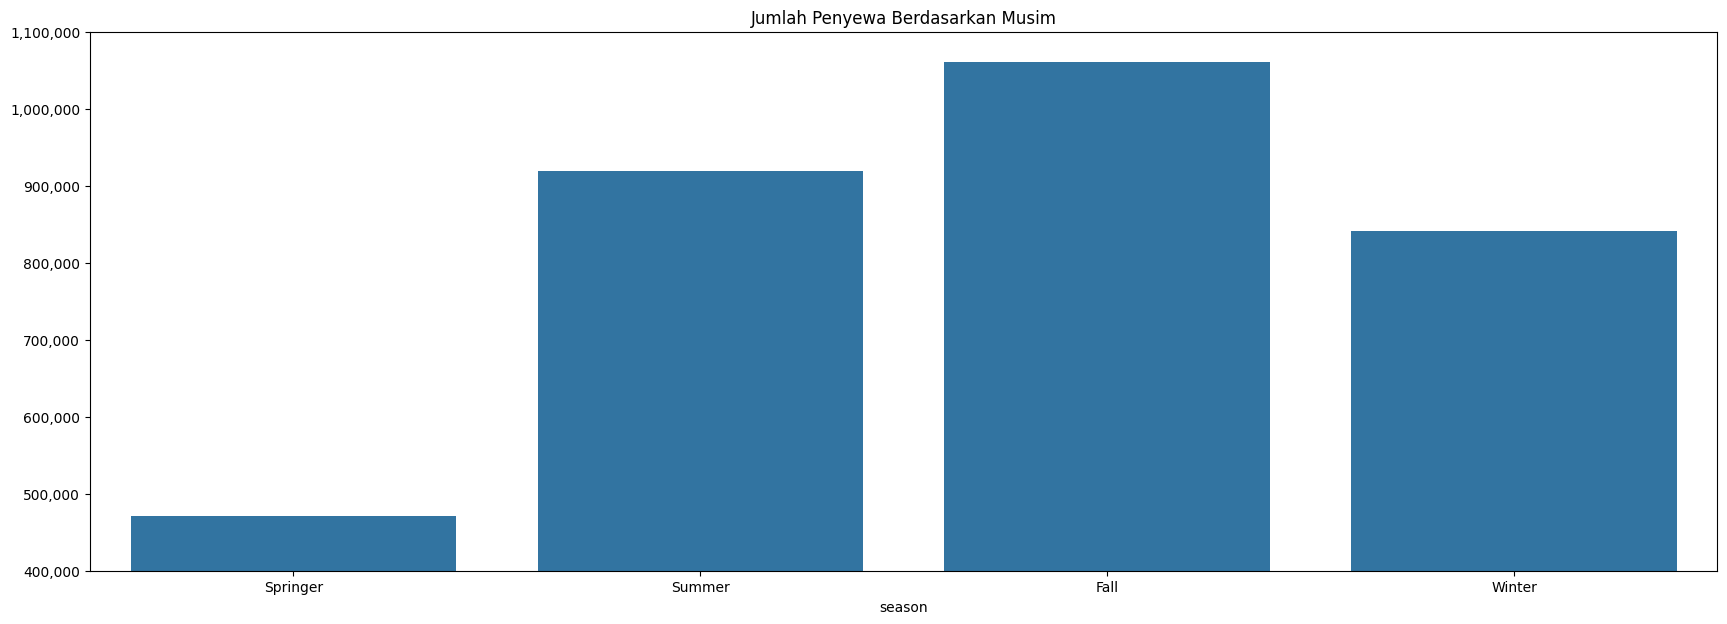

In [23]:
fig1, ax1 = plt.subplots(figsize=(21, 7))
sns.barplot(x="season", y="cnt", data=sum_season_df, ax=ax1)
plt.title("Jumlah Penyewa Berdasarkan Musim")
ax1.set_ylabel(None)
ax1.set_ylim(400000, 1100000)
ax1.yaxis.set_major_formatter('{x:,.0f}')
ax1.set_xticklabels(["Springer", "Summer", "Fall", "Winter"])

Dari bar chart di atas, dapa dilihat bahwa penyewa sepeda paling banyak pada musim gugur sampai lebih dari satu juta penyewa dan paling sedikit pada musing semi dengan penyewa kurang dari 500.000.

### Pertanyaan 2:

Membuat data frame untuk menjawab pertanyaan kedua

In [24]:
sum_day_categorizeHour_df = day_hours_df.groupby(by=['weekday_x','hour_categorize']).agg({'cnt_y': 'sum'})
sum_day_categorizeHour_df

cnt_y
weekday_x hour_categorize        
0         Dini Hari         29160
          Malam             99729
          Pagi              90477
          Siang            224661
1         Dini Hari          9707
          Malam            148065
          Pagi             131847
          Siang            165884
2         Dini Hari          8091
          Malam            158014
          Pagi             141777
          Siang            161227
3         Dini Hari          9625
          Malam            157620
          Pagi             147965
          Siang            157838
4         Dini Hari         10447
          Malam            163419
          Pagi             147601
          Siang            163928
5         Dini Hari         13097
          Malam            142328
          Pagi             146793
          Siang            185572
6         Dini Hari         26382
          Malam            116934
          Pagi             100859
          Siang            233632

<ipython-input-26-b76227568ee5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Minggu','Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])


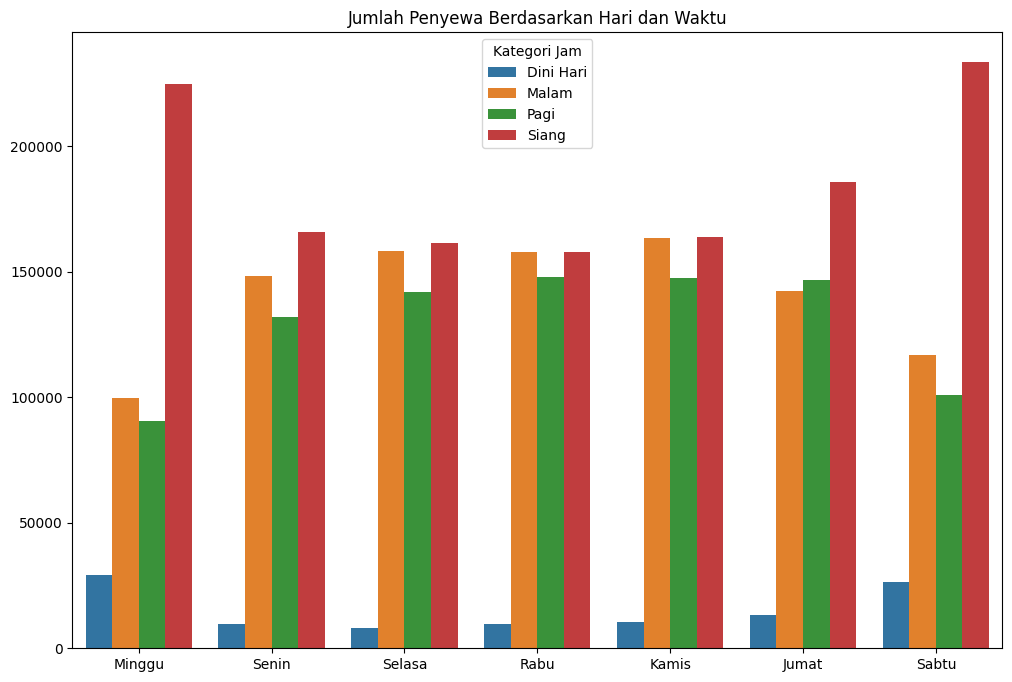

In [26]:
fig2, ax2 = plt.subplots(figsize=(12, 8))
sns.barplot(x='weekday_x', y='cnt_y', hue='hour_categorize', data=sum_day_categorizeHour_df,ax=ax2)

plt.title('Jumlah Penyewa Berdasarkan Hari dan Waktu')
plt.xlabel(None)
ax2.set_ylabel(None)
ax2.set_xticklabels(['Minggu','Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])

# Tampilkan legenda
plt.legend(title='Kategori Jam')

# Tampilkan grafik
plt.show()

Dari bar chart di atas, terlihat bahwa sepeda paling banyak disewa pada hari sabtu siang mencapai lebih dari 200.000 penyewa selisih sedikit dengan hari minggu siang yang juga mencapai lebih dari 200.000 penyewa dan paling sedikit pada hari selasa dini hari hanya sekitar 8000 penyewa. Dari semua waktu, paling sedikit sepeda disewa pada waktu Dini Hari (jam 1-5)

## Conclusion

- Conclution pertanyaan 1

Sepeda paling banyak disewa pada musim gugur dengan total penyewa 1.061.129 dan yang paling sedikit pada musim semi dengan total penyewa 471.348. Selisih jumlah penyewa pada musim gugur dengan musim yang lain terbilang sedikit, tetapi selisih dengan musim semi cukup jauh dan jumlah penyewa pada musim semi bisa dibilang cukup anjlok.
- Conclution pertanyaan 2

Sepeda paling banyak disewa pada hari sabtu siang dengan total 233.632 dan disusul minggu siang dengan total penyewa 224.661 sementara paling sedikit adalah selasa dini hari dengan total penyewa 8.091. Terlihat bahwa dini hari merupakan waktu yang paling sedikit sepeda disewa karena waktu tersebuta adalah waktunya orang istirahat.